---

<div align="center">

# 📊 **Employee Retention Prediction**

### *A Data-Driven Approach to Workforce Stability*

<br>
👨‍💻 Bhaumik Senwal &nbsp;|&nbsp; 2301730328

</div>

---

### 🧠 **Project Overview**  
This project aims to predict employee retention using machine learning techniques and data analytics. By identifying key factors that influence an employee’s decision to stay or leave, organizations can make informed, proactive HR decisions to improve workforce stability and reduce turnover costs.

---


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Set plotting style

In [129]:
plt.style.use('ggplot')
sns.set(style='whitegrid')

# 1. Data Loading and Exploration
# -----------------------------------------------

In [130]:
data = pd.read_csv('HR_comma_sep.csv')

# Display basic information about the dataset


In [131]:
print("Dataset shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
display(data.head())

Dataset shape: (14999, 10)

First 5 rows of the dataset:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Check for missing values


In [132]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


# Summary statistics


In [133]:
print("\nSummary statistics:")
display(data.describe())


Summary statistics:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Check the data types


In [134]:
print("\nData types:")
print(data.dtypes)


Data types:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


# Check target variable distribution


In [135]:
print("\nTarget variable distribution:")
print(data['left'].value_counts(normalize=True))


Target variable distribution:
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


# 2. Exploratory Data Analysis (EDA)
# -----------------------------------------------

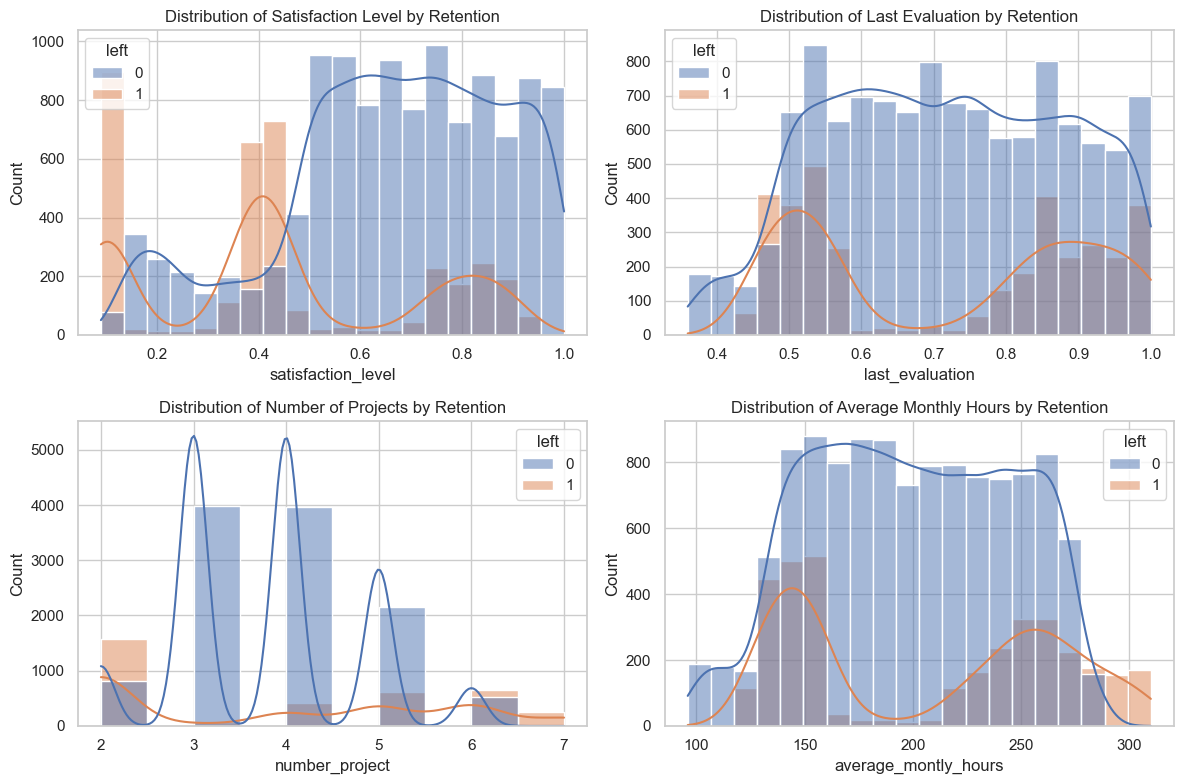

In [136]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='satisfaction_level', hue='left', bins=20, kde=True)
plt.title('Distribution of Satisfaction Level by Retention')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x='last_evaluation', hue='left', bins=20, kde=True)
plt.title('Distribution of Last Evaluation by Retention')

plt.subplot(2, 2, 3)
sns.histplot(data=data, x='number_project', hue='left', bins=10, kde=True)
plt.title('Distribution of Number of Projects by Retention')

plt.subplot(2, 2, 4)
sns.histplot(data=data, x='average_montly_hours', hue='left', bins=20, kde=True)
plt.title('Distribution of Average Monthly Hours by Retention')

plt.tight_layout()
plt.show()

# More plots for categorical variables


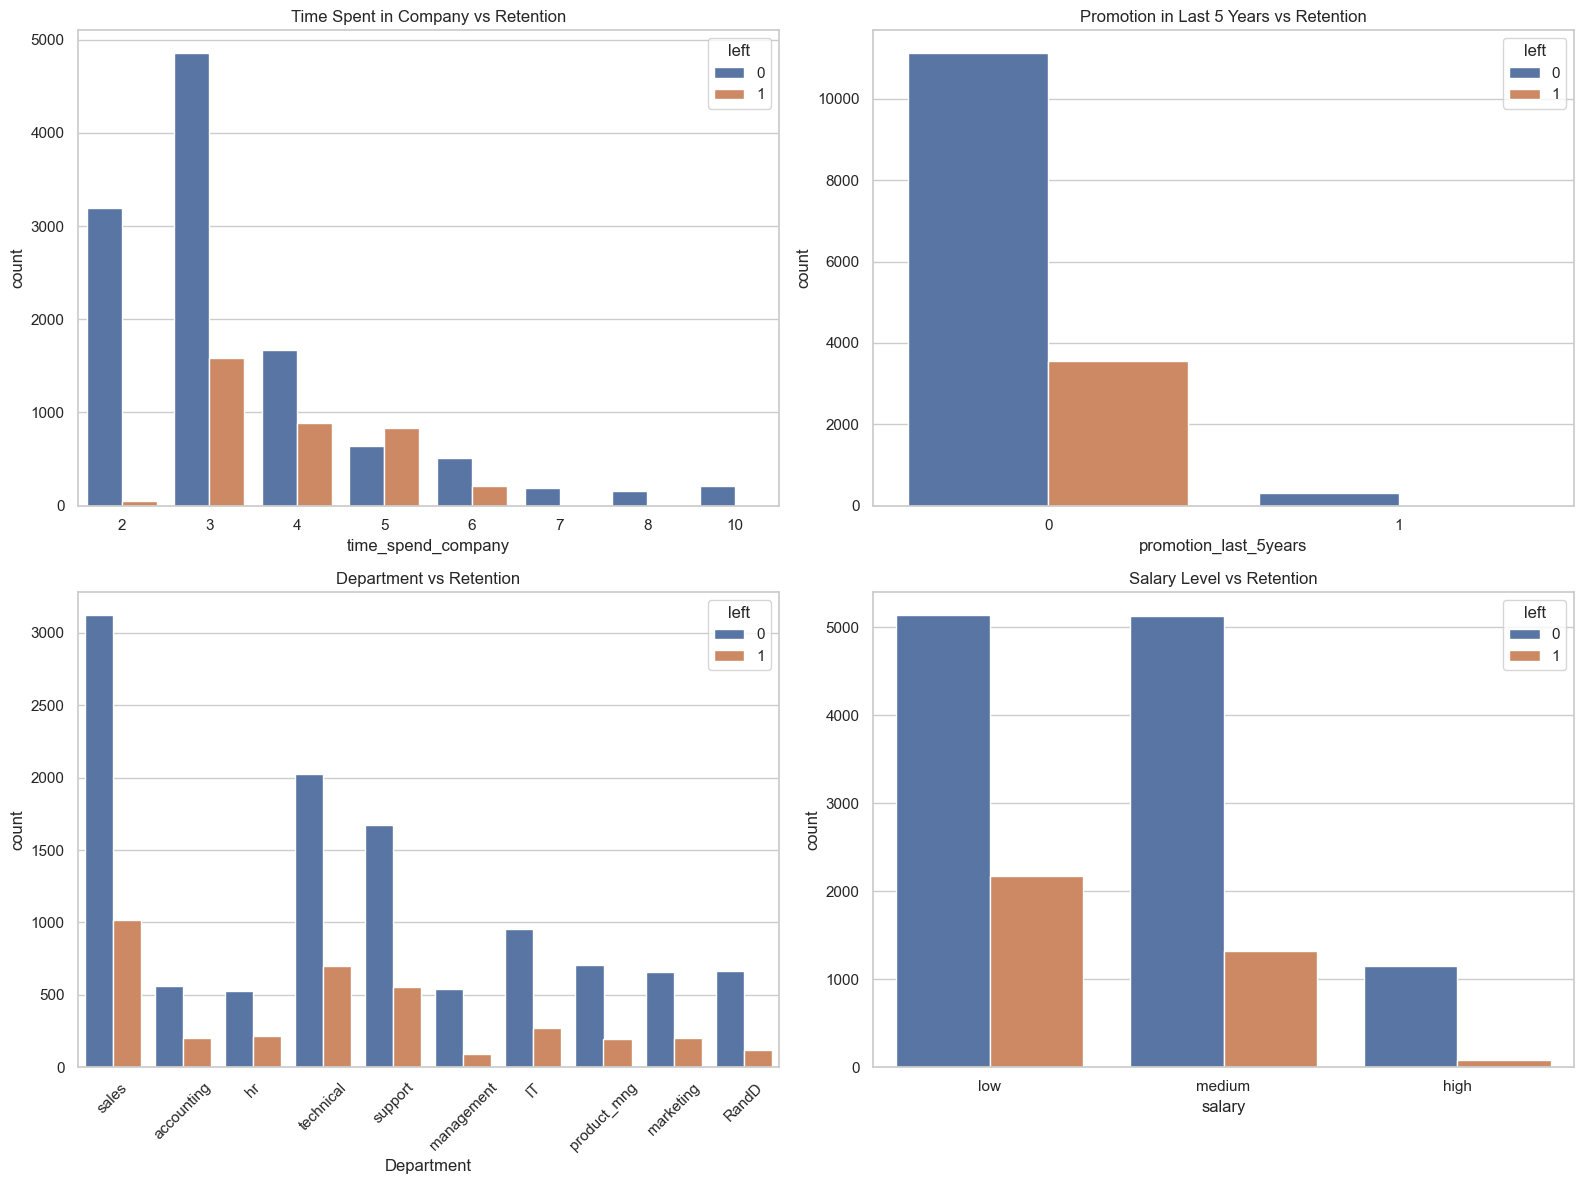

In [137]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(data=data, x='time_spend_company', hue='left')
plt.title('Time Spent in Company vs Retention')

plt.subplot(2, 2, 2)
sns.countplot(data=data, x='promotion_last_5years', hue='left')
plt.title('Promotion in Last 5 Years vs Retention')

plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Department', hue='left')
plt.xticks(rotation=45)
plt.title('Department vs Retention')

plt.subplot(2, 2, 4)
sns.countplot(data=data, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Salary Level vs Retention')

plt.tight_layout()
plt.show()

# Correlation matrix for numerical features


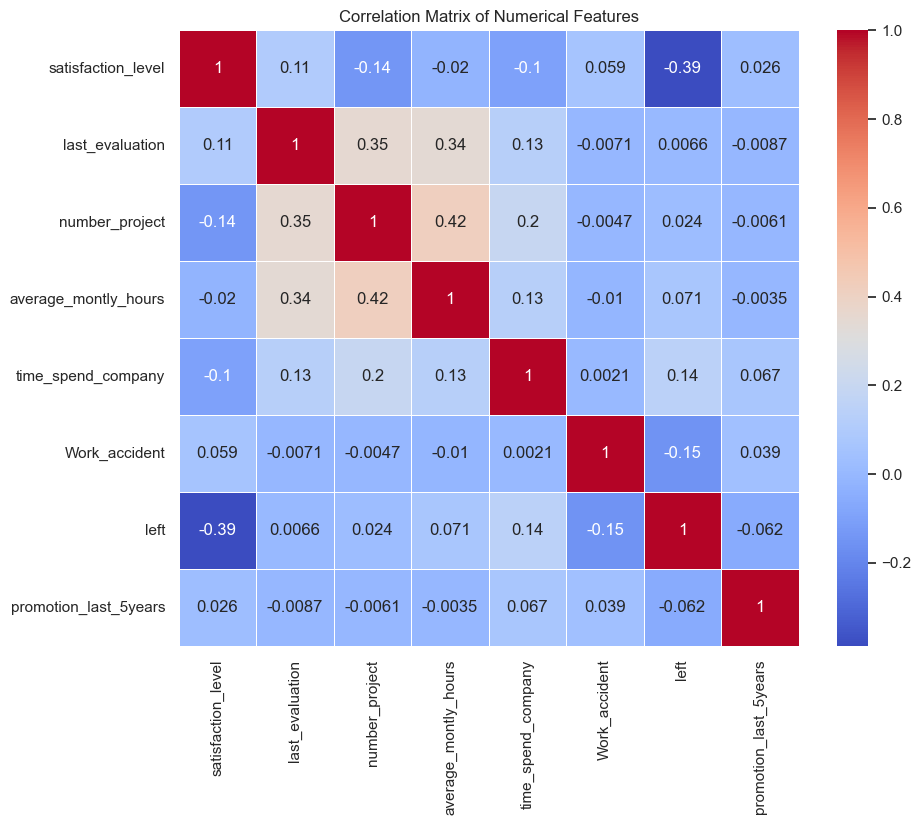

In [138]:
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



# Check for interesting patterns - high work hours and number of projects


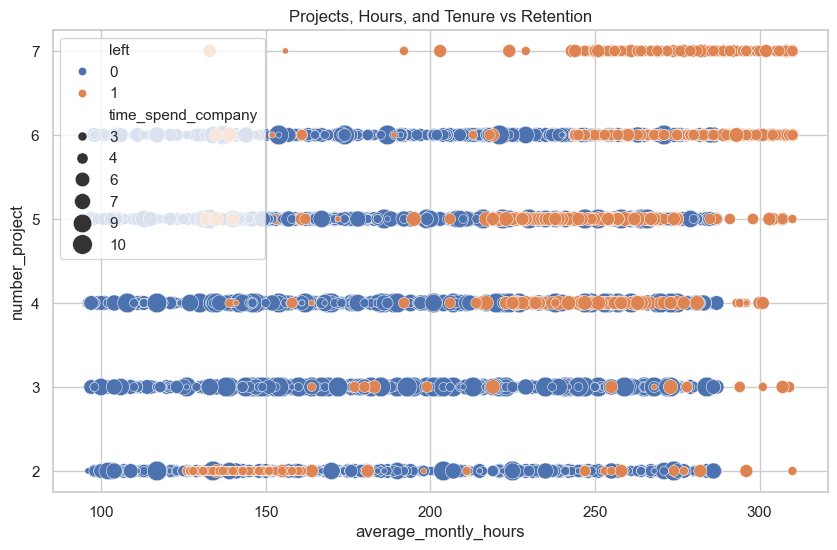

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='average_montly_hours', y='number_project', hue='left', size='time_spend_company', sizes=(20, 200))
plt.title('Projects, Hours, and Tenure vs Retention')
plt.show()

# Combined effect of satisfaction and evaluation


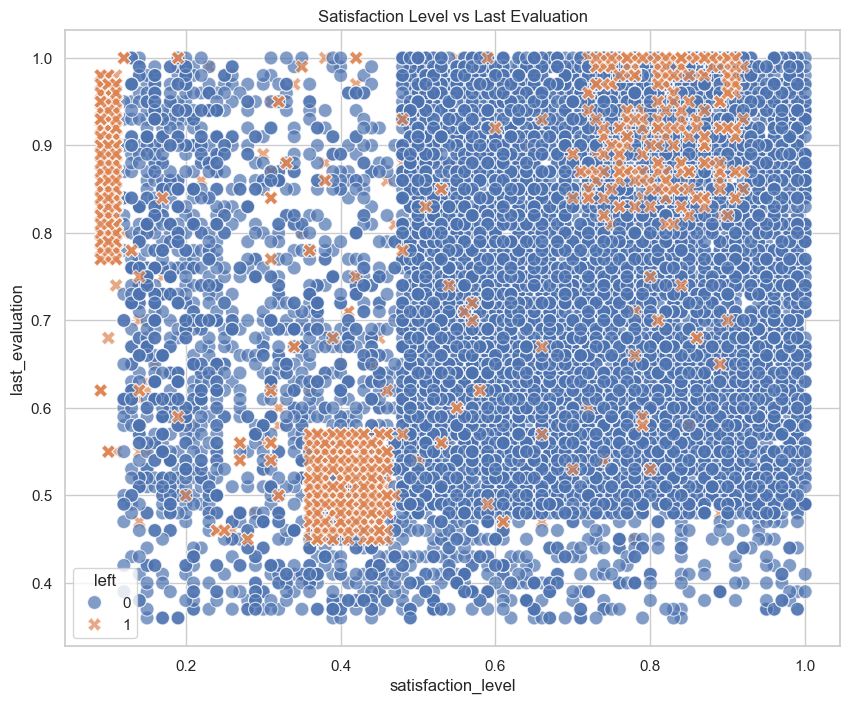

In [140]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='left', style='left', s=100, alpha=0.7)
plt.title('Satisfaction Level vs Last Evaluation')
plt.show()

# Department-wise average statistics


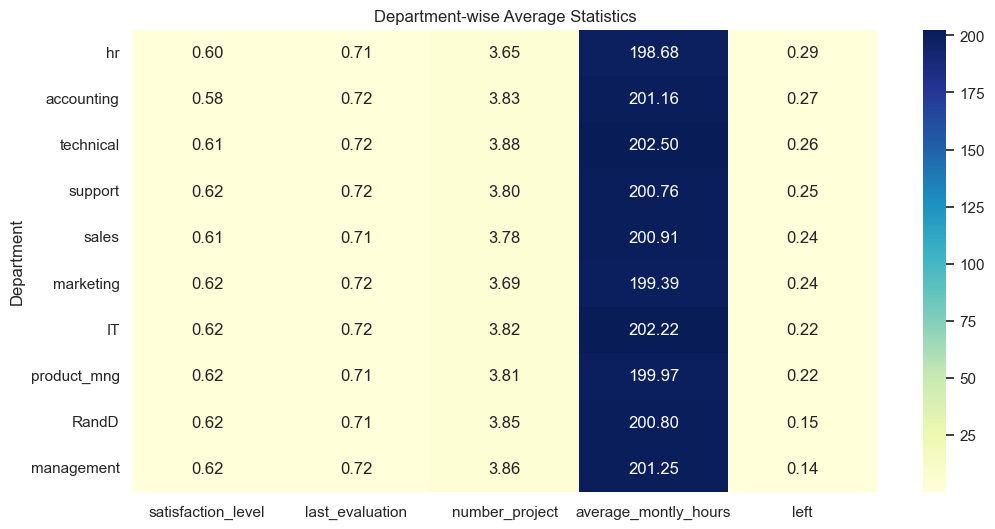

In [141]:
dept_stats = data.groupby('Department')[['satisfaction_level', 'last_evaluation', 'number_project', 
                                        'average_montly_hours', 'left']].mean().sort_values(by='left', ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(dept_stats, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Department-wise Average Statistics')
plt.show()

# Additional analysis: Salary vs Satisfaction Level


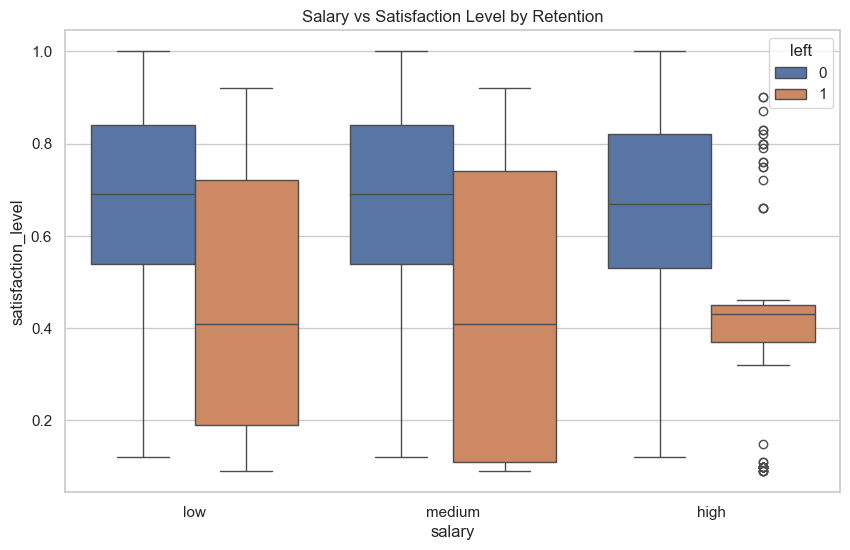

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='salary', y='satisfaction_level', hue='left', order=['low', 'medium', 'high'])
plt.title('Salary vs Satisfaction Level by Retention')
plt.show()


# 3. Data Preprocessing for Modeling
# -----------------------------------------------

In [143]:
X = data.drop('left', axis=1)
y = data['left']


# Identify categorical and numerical columns


In [144]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Split the data into training and testing sets


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create preprocessor


In [146]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)


# 4. Define model evaluation function
# -----------------------------------------------

In [147]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and return metrics"""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Print results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Return metrics for comparison
    return {
        'model': model_name,
        'accuracy': accuracy,
        'auc': roc_auc
    }

# 5. Train and evaluate models
# -----------------------------------------------

# 5.1 Logistic Regression


Training Logistic Regression model...

Model: Logistic Regression
Accuracy: 0.7943
AUC: 0.8280

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.35      0.45       714

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



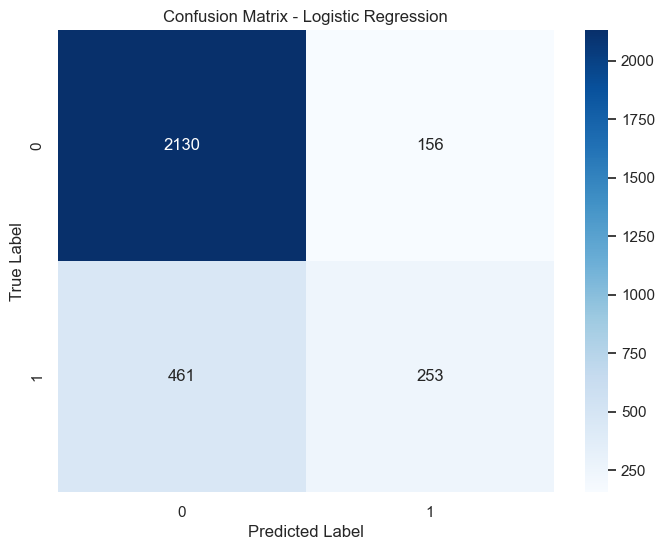

In [148]:
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print("Training Logistic Regression model...")
log_reg_pipeline.fit(X_train, y_train)
log_reg_metrics = evaluate_model(log_reg_pipeline, X_test, y_test, "Logistic Regression")

# 5.2 Decision Tree


Training Decision Tree model...

Model: Decision Tree
Accuracy: 0.9763
AUC: 0.9724

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.94      0.96      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



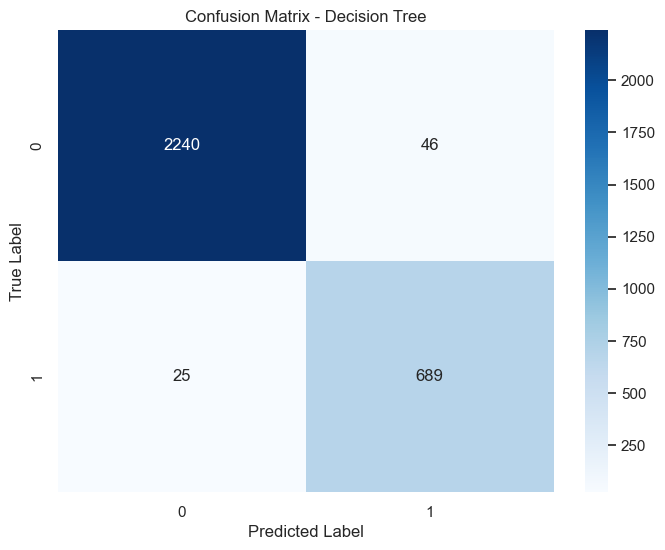

In [149]:
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

print("Training Decision Tree model...")
dt_pipeline.fit(X_train, y_train)
dt_metrics = evaluate_model(dt_pipeline, X_test, y_test, "Decision Tree")

# 5.3 Random Forest


Training Random Forest model...

Model: Random Forest
Accuracy: 0.9903
AUC: 0.9895

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



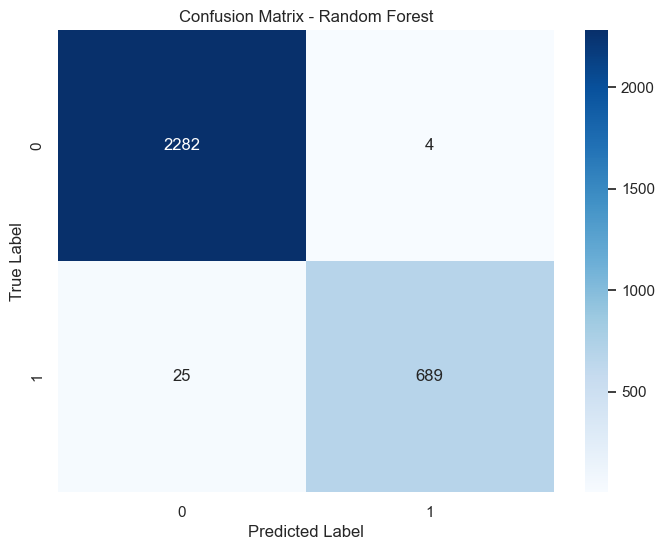

In [150]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")

# 6. Compare model performances
# -----------------------------------------------

In [151]:
models = [log_reg_metrics, dt_metrics, rf_metrics]
model_names = [model['model'] for model in models]
accuracies = [model['accuracy'] for model in models]
aucs = [model['auc'] for model in models]

# Create a comparison DataFrame


In [152]:
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'AUC': aucs
})

print("\nModel Comparison:")
print(comparison_df.sort_values('Accuracy', ascending=False))


Model Comparison:
                 Model  Accuracy       AUC
2        Random Forest  0.990333  0.989486
1        Decision Tree  0.976333  0.972432
0  Logistic Regression  0.794333  0.827979


# Plot model comparison


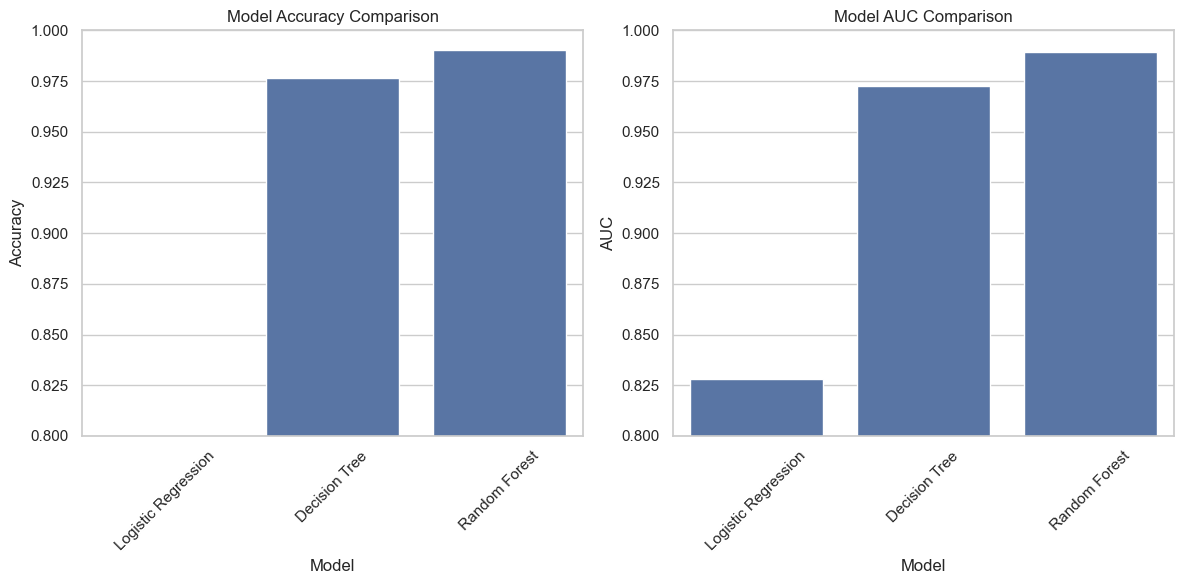

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='AUC', data=comparison_df)
plt.title('Model AUC Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  

plt.tight_layout()
plt.show()

# 7. Get feature importance from the best model (Random Forest)
# -----------------------------------------------

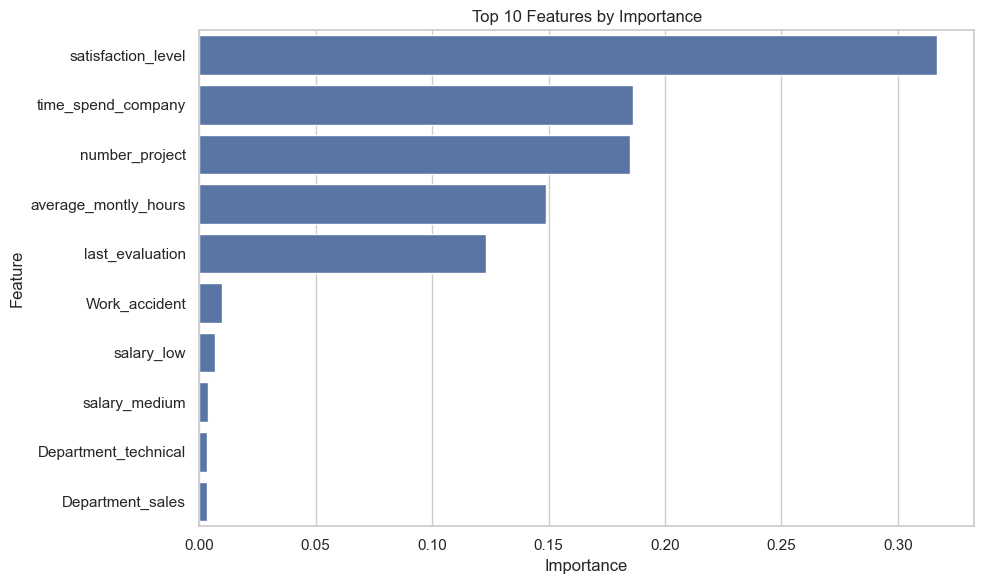


Top 5 most important features:
1. satisfaction_level: 0.3169
2. time_spend_company: 0.1862
3. number_project: 0.1848
4. average_montly_hours: 0.1488
5. last_evaluation: 0.1230


In [ ]:
if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'):
    preprocessor.fit(X_train)
    
    cat_features = []
    if categorical_cols:
        cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_features = cat_encoder.get_feature_names_out(categorical_cols).tolist()
    
    all_features = numerical_cols + cat_features
    
    importances = rf_pipeline.named_steps['classifier'].feature_importances_
    
    if len(all_features) == len(importances):
        importance_df = pd.DataFrame({
            'Feature': all_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title('Top 10 Features by Importance')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 5 most important features:")
        for i in range(min(5, len(importance_df))):
            print(f"{i+1}. {importance_df['Feature'].iloc[i]}: {importance_df['Importance'].iloc[i]:.4f}")

 # Cross-Validation

In [156]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.99866667 0.97966667 0.98366667 0.99933333 0.99333111]
Mean CV Accuracy: 0.9909


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = rf_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9903


In [157]:
best_model_idx = np.argmax(accuracies)
best_model_name = model_names[best_model_idx]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


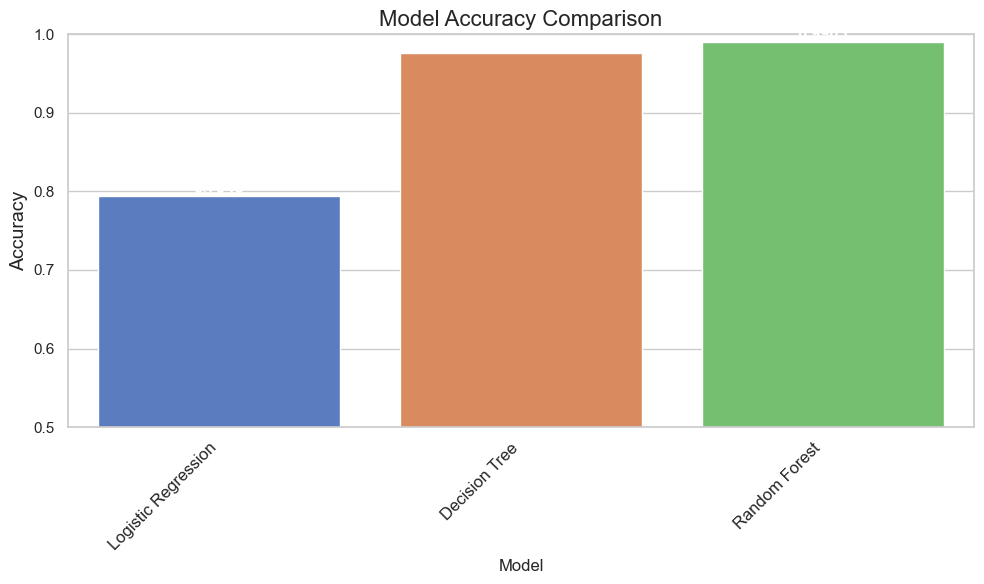

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='muted')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)  
plt.tight_layout()
plt.show()


In [163]:
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"\n Best Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


 Best Model: Random Forest with Accuracy = 0.9903
